In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/johnr/Downloads/Adidas US Sales Datasets.xlsx")

In [3]:
data.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [4]:
import datetime
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

# Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Year
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.865050
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.341688
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000


# Uni Variate Analysis

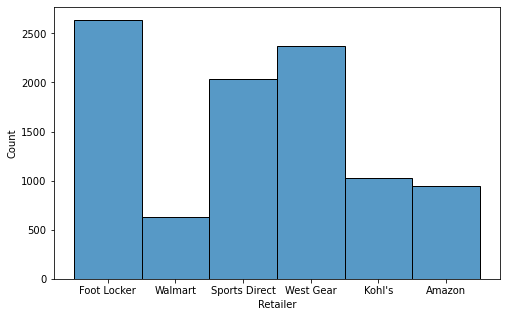

In [7]:
plt.figure(figsize = (8,5))
sns.histplot(data['Retailer'])
plt.show()

-Footlocker is the highest trending followed by West Gear

<AxesSubplot:xlabel='Region', ylabel='Count'>

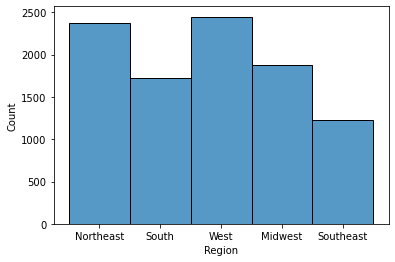

In [8]:
sns.histplot(data['Region'])

<AxesSubplot:xlabel='Total Sales', ylabel='Count'>

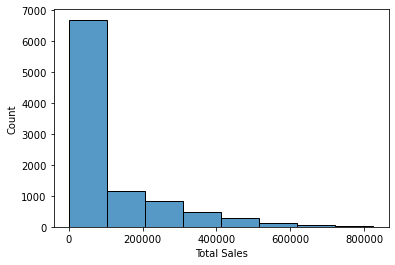

In [9]:
sns.histplot(data['Total Sales'], bins = 8)

The Total Sales is right skewed

<AxesSubplot:xlabel='Operating Profit', ylabel='Count'>

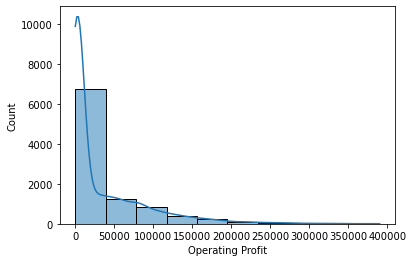

In [10]:
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

As total sales is dependant on profit, Operational Profit is also right skewed

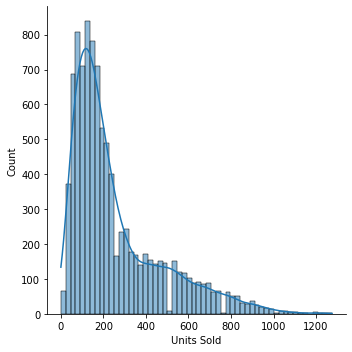

In [12]:
sns.displot(data['Units Sold'], kde = True)
plt.show()

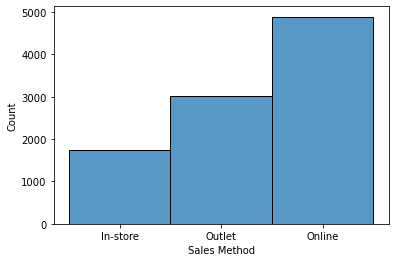

In [13]:
sns.histplot(data['Sales Method'])
plt.show()

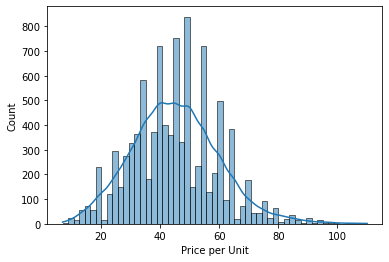

In [14]:
sns.histplot(data['Price per Unit'], kde = True)
plt.show()

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit, Operating Margin and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed
4. Online sales are the highest
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

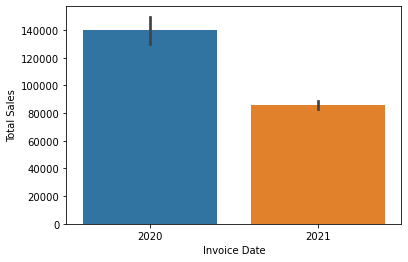

In [15]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales')
plt.show()

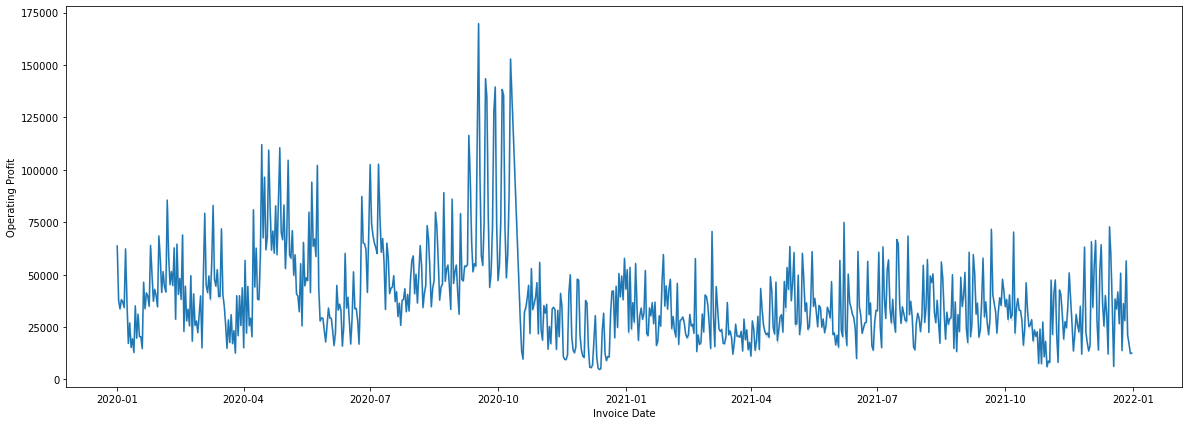

In [16]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False)
plt.show()

- The profit spiked from 8/20 to 10/20
- There was an immediate dip in Operating profit
- The profits stayed consistent post the dip maximizing just above 50,000

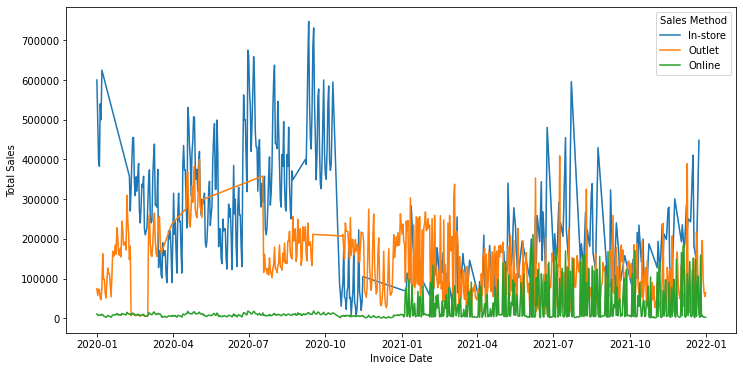

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method')
plt.show()

- The decrease in Total Sales is heavily dependent on the dip observed by the 'In-store' Sales method 
- Outlet sales have rather been fluctuating in the similar range throughout
- Online sales have picked up from 2021

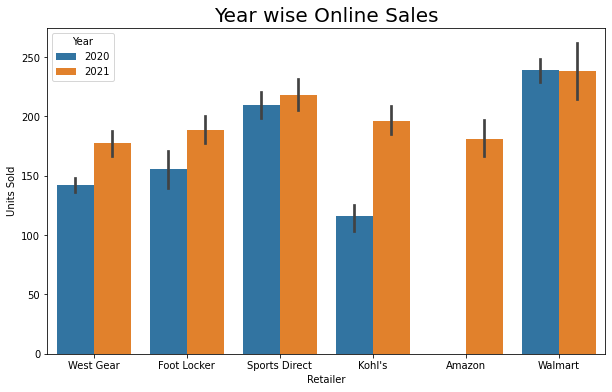

In [18]:
##PLOTTING ONLINE DATA 
OnlineData = pd.DataFrame(data[['Retailer','Sales Method', 'Units Sold', 'Year']][data['Sales Method'] == 'Online'])
plt.figure(figsize = (10,6))
sns.barplot(data = OnlineData, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Year wise Online Sales', fontdict={'size': 20})
plt.show()

## Reasons for subsequent surge in online sales
- Sales via 'Amazon' was started in the year 2021
- Kohl's sales of Adidas products increased significantly
- Footlocker and WestGear have seen an increase in sales online vs 2020

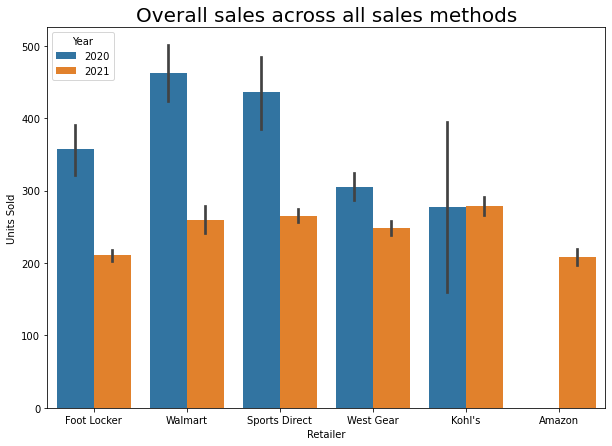

In [19]:
plt.figure(figsize = (10,7))
sns.barplot(data = data, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Overall sales across all sales methods',fontdict={'size': 20})
plt.show()

- Footlocker, Walmart and Sports Direct have dropped their sales significantly in 2021 when compared to 2020
- Kohl's overall sales remained similar comparatively

**THIS IMPLIES THAT THE DIP IN SALES IS DUE TO IN-STORE SALES**

## Why did the sales drop in stores? 

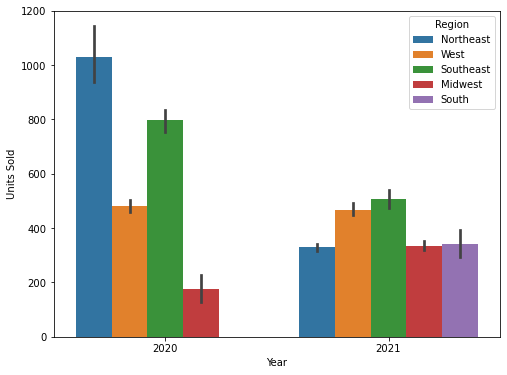

In [20]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region')
plt.show()

- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- However, the sales in 2021 throughout has reduced

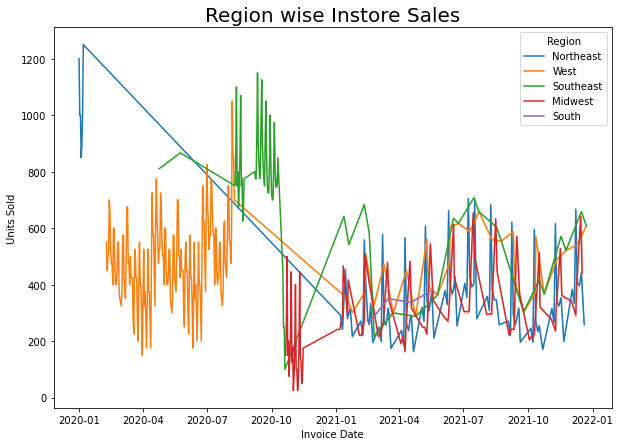

In [21]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[data['Sales Method'] == 'In-store'], x = 'Invoice Date', y = 'Units Sold', hue = 'Region', ci = False).set_title('Region wise Instore Sales', fontdict={'size': 20})
plt.show()

1. Northeast and Southeast regions experienced a massive dip in terms of Units sold
2. There was an increase in West region which collapsed later on as well

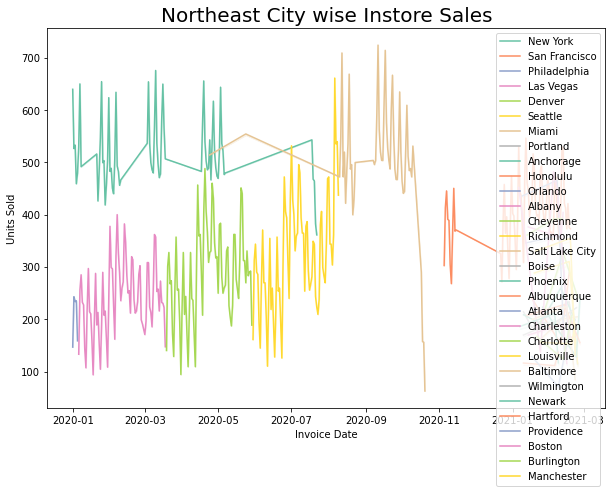

In [193]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Units Sold',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

### The following cities which record the highest units sold stopped contributing to the overall sales in Q4 2020:
1. Miami from the Southeast region (Between April 2020 to December 2020)
2. New York from the Northeast region (Between January 2020 to September 2020) 
3. Las Vegas, Seattle and Denver from the West region (Quarterly until August 2020)


- It was also observed that from 01/2021, various cities have STARTED recording sales in these regions. This can imply:
    - These three stints (in 2020) were a part of test run for expanding their sales' geofence in 2021
    - The end of these test runs caused the dip in the Total Sales

# CORRELATION

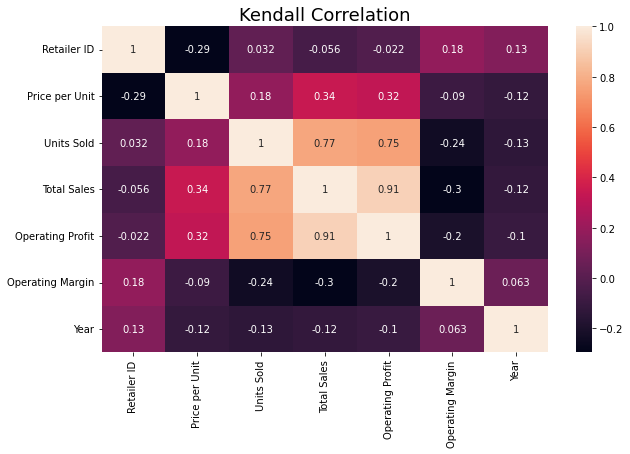

In [200]:
correlation = data.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

#print('Features\'s correlation with Target Feature')
#for indx, cor in enumerate(correlation['Total Sales']):
 #   print(correlation.index[indx], cor)

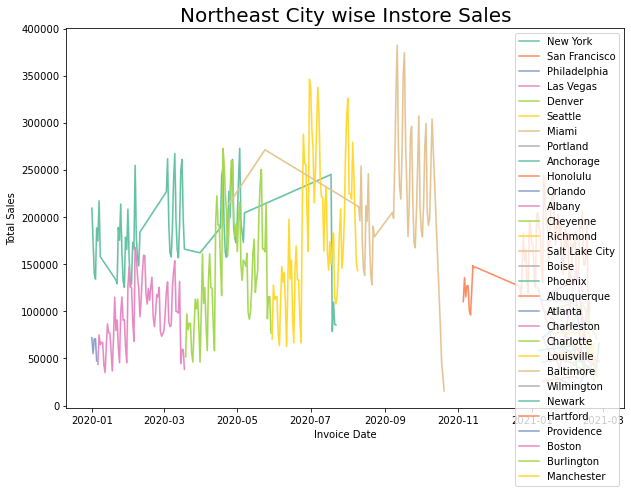

In [30]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()